In [8]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [63]:
#defining!!!

sun_radius = 695508587
earth_radius = 6371000

init = State(x=0,
             y=147e9,
             vx=30330,
             vy=0)

,values
x,0.000000e+00
y,1.470000e+11
vx,3.033000e+04
vy,0.000000e+00


In [64]:
system = System (init=init,
                G= 6.674e-11, #* N / kg**2 * m**2,
                m1  = 1.989e30, #* kg,
                m2 =  5.972e24, #* kg
                r_end = sun_radius + earth_radius,
                t_end = 1e7, #*s
                )

,values
init,x 0.000000e+00 y 1.470000e+11 vx 3....
G,6.674e-11
m1,1.989e+30
m2,5.972e+24
r_end,701879587
t_end,1e+07


In [65]:
def universal_gravitation(state, system):
    x,y,vx,vy = state
    unpack(system)
    direction = Vector(-x, -y)
    force = (G*m1*m2)/(x**2+y**2)
    gravity = force * direction.hat()
    return gravity

In [66]:
universal_gravitation(init, system)

<Quantity([-0.0000000e+00 -3.6686486e+22], 'dimensionless')>

In [67]:
def slope_func(state, t, system):
    x,y,vx,vy = state 
    unpack(system)
    v = Vector(vx, vy)
    force = universal_gravitation(state,system)
    
    dxdt = vx
    dydt = vy
    dvxdt = force.x / m2
    dvydt = force.y / m2
    
    
    return dxdt, dydt, dvxdt, dvydt

In [68]:
slope_func(init, 0, system)

(30330.0,
 0.0,
 <Quantity(-0.0, 'dimensionless')>,
 <Quantity(-0.006143082049146188, 'dimensionless')>)

In [69]:
#def event_func(state, t, system):
    #r,v = state
    #return r - system.r_end

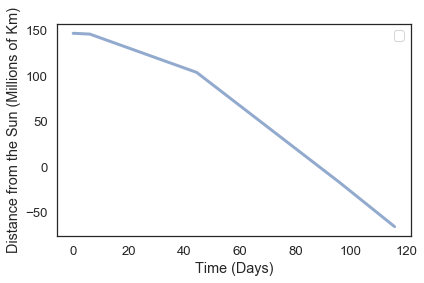

In [70]:
results, details = run_ode_solver(system, slope_func)
results.index /= 60*60*24
results.y /= 1e9
plot(results.y)
decorate(xlabel = 'Time (Days)',
         ylabel = 'Distance from the Sun (Millions of Km)')


In [71]:
t_event = get_last_label(results) 
print(t_event, "days")

115.74074074074075 days
